In [3]:
#import library
import numpy as np
import pandas as pd
import yfinance as yf #Stock Data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from transformers import pipeline
import finnhub #Company News
import torch

pd.set_option('display.max_colwidth',180)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-10-10 08:46:31.715292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Companies top 500 

In [8]:
companies = pd.read_csv('/Users/natashaprabhoo/AI-ML-Studio/S&P_500_companies.csv')
company_symbol = 'AAPL'

companies.head(15)


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999


## Stock Data

In [9]:
stock_data = yf.download(company_symbol,start='2023-1-1',end=datetime.today())
stock_data = stock_data.reset_index()
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855095,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412201,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937302,70790800


## Company News

In [18]:
finnhub_client = finnhub.Client(api_key="cnl0n1pr01qjvabn3kngcnl0n1pr01qjvabn3ko0")
news = pd.DataFrame(finnhub_client.company_news(company_symbol, _from="2020-01-01", to='2024-01-01')).drop(columns=['id','image','category','url'])
news['datetime'] = pd.to_datetime(news['datetime'], unit='s').dt.strftime('%Y-%m-%d')
news['datetime'] = pd.to_datetime(news['datetime'])


news.head()

,datetime,headline,related,source,summary
0,2024-01-01,Buffett's Bullseye: Meet The 4 Stocks That Make Up Nearly 75% Of His Portfolio,AAPL,Yahoo,"Legendary investor Warren Buffett has long preached the importance of passive investing in large-cap stocks. ""Beware the investment activity that produces applause; the great m..."
1,2024-01-01,"Apple: Accept The Gift, Move On",AAPL,SeekingAlpha,"Apple's stock rally in 2023 appears unjustified, fueled by hype and brand loyalty rather than actual growth. Read why AAPL stock is a Sell."
2,2024-01-01,"Investing Preview 2024: Buy These 4 ""Magnificent Seven"" Stocks. Avoid the Others.",AAPL,Yahoo,"The ""Magnificent Seven"" stocks have varying valuations. Four have room to run, and three have gotten too rich."
3,2024-01-01,"Which ""Magnificent Seven"" Stocks Are Screaming Buys Right Now?",AAPL,Yahoo,Only three of the seven make the cut as buys at current levels.
4,2024-01-01,10 Information Technology Stocks With Whale Alerts In Today's Session,AAPL,Benzinga,Looking for stock market analysis and research with proves results? Zacks.com offers in-depth financial research with over 30years of proven results.


In [ ]:
import requests

url = f'https://eodhd.com/api/news?s=AAPL.US&offset=0&limit=10&api_token=demo&fmt=json'
data = requests.get(url).json()

print(data)

In [19]:
news.head()
news['datetime'].nunique()


6

In [120]:
finnhub_client = finnhub.Client(api_key="cnl0n1pr01qjvabn3kngcnl0n1pr01qjvabn3ko0")
news = pd.DataFrame(finnhub_client.company_news(company_symbol, _from="2023-01-01", to='2024-01-01')).drop(columns=['id','image','category','url'])
news['datetime'] = pd.to_datetime(news['datetime'], unit='s').dt.strftime('%Y-%m-%d')
news['datetime'] = pd.to_datetime(news['datetime'])

news.head()

,datetime,headline,related,source,summary
0,2024-01-01,Buffett's Bullseye: Meet The 4 Stocks That Make Up Nearly 75% Of His Portfolio,AAPL,Yahoo,"Legendary investor Warren Buffett has long preached the importance of passive investing in large-cap stocks. ""Beware the investment activity that produces applause; the great m..."
1,2024-01-01,"Apple: Accept The Gift, Move On",AAPL,SeekingAlpha,"Apple's stock rally in 2023 appears unjustified, fueled by hype and brand loyalty rather than actual growth. Read why AAPL stock is a Sell."
2,2024-01-01,"Investing Preview 2024: Buy These 4 ""Magnificent Seven"" Stocks. Avoid the Others.",AAPL,Yahoo,"The ""Magnificent Seven"" stocks have varying valuations. Four have room to run, and three have gotten too rich."
3,2024-01-01,"Which ""Magnificent Seven"" Stocks Are Screaming Buys Right Now?",AAPL,Yahoo,Only three of the seven make the cut as buys at current levels.
4,2024-01-01,10 Information Technology Stocks With Whale Alerts In Today's Session,AAPL,Benzinga,Looking for stock market analysis and research with proves results? Zacks.com offers in-depth financial research with over 30years of proven results.


In [121]:
finnhub_client = finnhub.Client(api_key="cnl0n1pr01qjvabn3kngcnl0n1pr01qjvabn3ko0")
def get_news(stock, start_date='2023-03-07', end_date=datetime.today().date() - timedelta(days=1)):
    today_date = datetime.today().date()
    
    news = pd.DataFrame(finnhub_client.company_news(company_symbol, _from="2023-01-01", to='2024-01-01')).drop(columns=['id','image','category','url'])

    news['datetime'] = pd.to_datetime(news['datetime'], unit='s').dt.strftime('%Y-%m-%d')
    news['datetime'] = pd.to_datetime(news['datetime'])
    news = news.sort_values('datetime', ascending=True)

    sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

    # Add sentiment analysis for each headline
    news['truncated_headline'] = news['headline'].apply(lambda x: truncate_sequence(x))
    news['headline_sentiment'] = news['truncated_headline'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
    news['headline_sentiment_score'] = news['truncated_headline'].apply(lambda x: sentiment_pipeline(x)[0]['score'])
    news['sentiment_binary'] = news['headline_sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

    return news[['datetime', 'source', 'headline', 'headline_sentiment', 'headline_sentiment_score', 'sentiment_binary']]

def truncate_sequence(text):
    return text if len(text) <= 512 else text[:512]

 
news_data = get_news(company_symbol)
print(news_data.head())

      datetime        source  \
217 2023-12-27  SeekingAlpha   
191 2023-12-27   MarketWatch   
190 2023-12-27       Finnhub   
189 2023-12-27       Finnhub   
188 2023-12-27         Yahoo   

                                                                                                                   headline  \
217                                                                           Meta Platforms: Potential $500 Target In 2024   
191                                                            Apple Inc. stock rises Wednesday, still underperforms market   
190                                                                                 Apple Watch ban halted by appeals court   
189  Apple Says Apple Watch Series 9, Apple Watch Ultra 2 Will Become Available For Purchase Again In US Starting Wednesday   
188                                                                          Apple Watch ban temporarily paused by US court   

    headline_sentiment  headline_sentiment_s

In [122]:
# Creating a datafram with the overall sentiment score for each day

news_data = get_news(company_symbol)
average_sentiment = news_data.groupby('datetime').agg({
    'sentiment_binary': 'mean'  
}).reset_index()

average_sentiment.rename(columns={'sentiment_binary': 'average_daily_sentiment'}, inplace=True)

average_sentiment['datetime'] = pd.to_datetime(average_sentiment['datetime'])
average_sentiment.set_index('datetime', inplace=True)
average_sentiment.head()

,average_daily_sentiment
datetime,
2023-12-27,0.244444
2023-12-28,0.506667
2023-12-29,0.509434
2023-12-30,0.666667
2023-12-31,0.625000


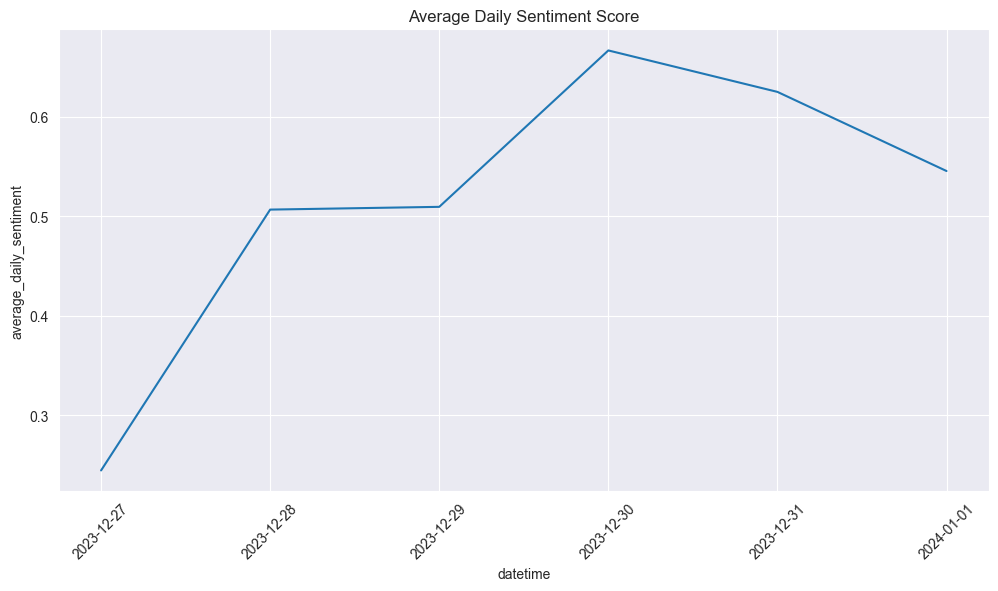

In [123]:
# Plotting the average sentiment score for each day
plt.figure(figsize=(12,6))
sns.lineplot(x='datetime',y='average_daily_sentiment',data=average_sentiment)
plt.title('Average Daily Sentiment Score')
plt.xticks(rotation=45)
plt.show()

In [124]:
# Testing stock data

stock = yf.Ticker(company_symbol)
stock_info = stock.info

print("Stock Name:", stock_info['shortName'])

# Fetching the stock's current and previous closing prices
print("Previous Close:", stock_info['regularMarketPreviousClose'])

# Fetching the stock's current price
current_price = stock_info.get('regularMarketPrice', 'Data not available')
if (current_price == 'Data not available'):
    current_price = stock_info.get('regularMarketPreviousClose', 'Data not available')
    print("Current Price:", current_price)

Stock Name: Apple Inc.
Previous Close: 225.67
Current Price: 225.67


In [125]:
def get_stock_data(stock_symbol, start_date='2023-03-07', end_date=datetime.today().date() - timedelta(days=1)):
    stock = yf.Ticker(stock_symbol)
    stock_info = stock.history(start=start_date, end=end_date)

    stock_df = pd.DataFrame({
        'datetime': stock_info.index.date,
        'previous_close': stock_info['Close']  
    })

    stock_df['datetime'] = pd.to_datetime(stock_df['datetime'])
    stock_df.set_index('datetime', inplace=True)
    return stock_df


stock_data = get_stock_data(company_symbol)
stock_data.head()

,previous_close
datetime,
2023-03-07,150.416733
2023-03-08,151.676819
2023-03-09,149.414627
2023-03-10,147.340942
2023-03-13,149.295547


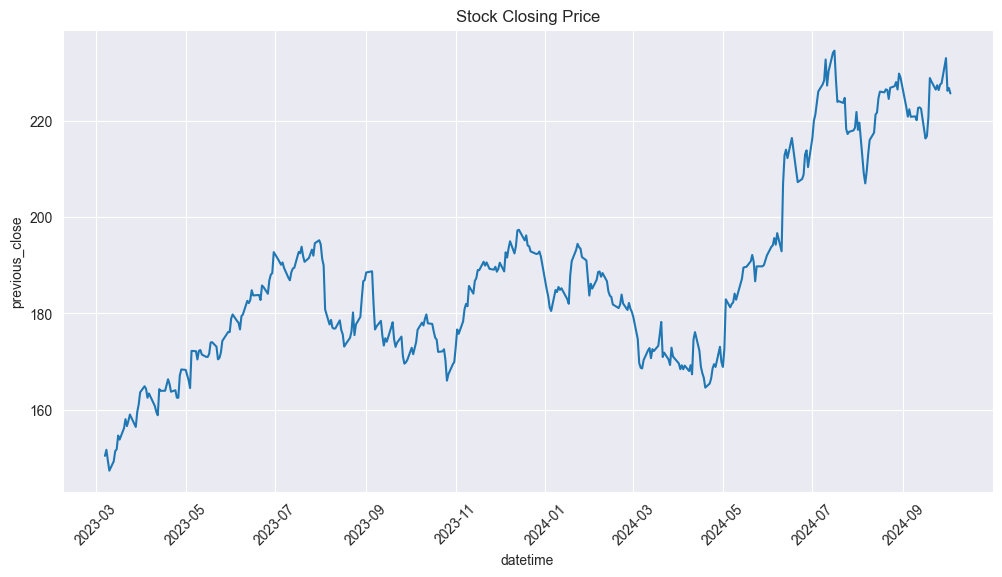

In [126]:
# Plotting the stock's closing price
plt.figure(figsize=(12,6))
sns.lineplot(x=stock_data.index,y='previous_close',data=stock_data)
plt.title('Stock Closing Price')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Ensure both DataFrames have normalized 'datetime'
stock_data.index = stock_data.index.normalize()  # Remove time component from stock_data
average_sentiment.index = average_sentiment.index.normalize()  # Remove time component from average_sentiment

# Merge the DataFrames only if both DataFrames have matching 'datetime' values
result = pd.merge(stock_data[['previous_close']], average_sentiment[['average_daily_sentiment']], 
                  left_index=True, right_index=True, how='left')

print("Merged Data:")
print(result.head())


AttributeError: 'RangeIndex' object has no attribute 'normalize'

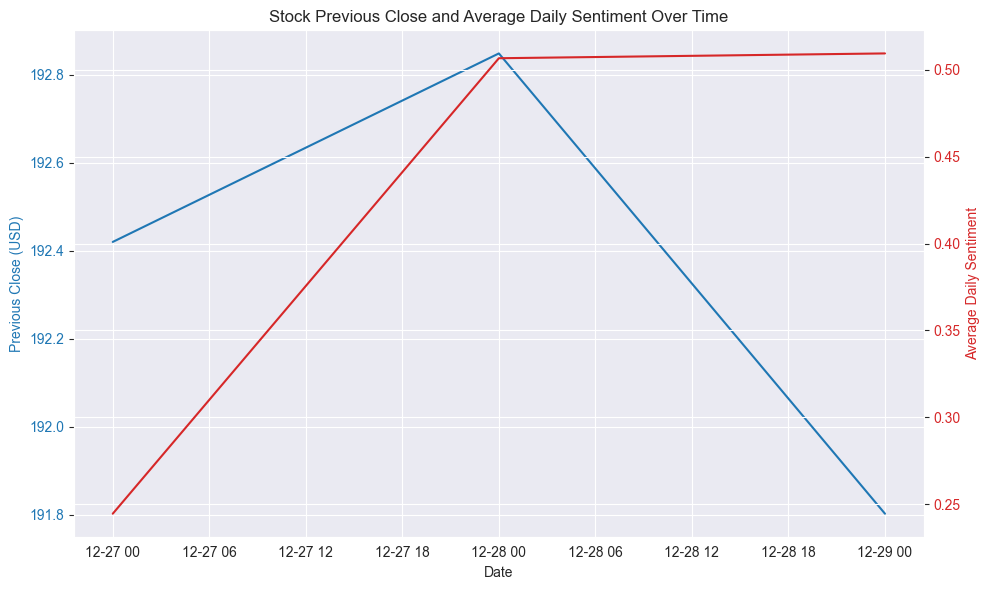

In [128]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Previous Close (USD)', color='tab:blue')
ax1.plot(result.index, result['previous_close'], color='tab:blue', label='Previous Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Daily Sentiment', color='tab:red')
ax2.plot(result.index, result['average_daily_sentiment'], color='tab:red', label='Average Daily Sentiment')
ax2.tick_params(axis='y', labelcolor='tab:red')


plt.title('Stock Previous Close and Average Daily Sentiment Over Time')
fig.tight_layout()  
plt.show()

[{'date': '2024-10-10T12:20:00+00:00', 'title': 'Amazon Prime Video will soon have Apple TV+ because streaming is just cable now', 'content': 'Apple (AAPL) TV+ will soon be available on Amazon’s (AMZN) Prime Video, as streaming platforms continue to consolidate to resemble the cable offerings they’ve largely outcompeted.\n\nLater this month, Prime Video subscribers will be able to add Apple’s streaming service for $9.99 a month, adding to Amazon’s more than 100 existing add-on subscription options, the company said Wednesday.\n\n“As we continue to expand our offering and make it easy for customers to personalize their streaming experience directly in one app, we are proud to welcome Apple TV+ and its popular and critically-acclaimed shows, films and events to Prime Video,” said Mike Hopkins, senior vice president and head of Prime Video and Amazon MGM Studios.\n\nApple TV+ is home to popular series including Ted Lasso and The Morning Show, as well as movies and live sports.\n\nAmazon a